In [2]:
options(device=pdf) # turn off flashy window on each block execution
options(repr.plot.width=7, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [4]:
library(ggplot2)
library(maps)
library(ggmap)

In [5]:
statesMap = map_data('state')

In [6]:
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


In [9]:
nrow(table(statesMap$group))

[1] 63

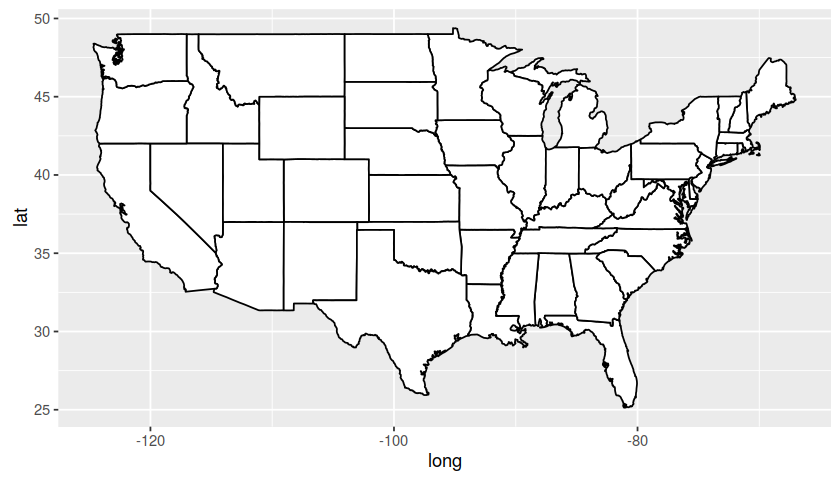

In [10]:
ggplot(statesMap, aes(x=long, y=lat, group=group)) +
    geom_polygon(fill='white', color='black')

In [12]:
polling = read.csv('data/PollingImputed.csv.xz')
train = subset(polling, Year<=2008)
test = subset(polling, Year>= 2012)

In [14]:
mod2 = glm(Republican ~ SurveyUSA + DiffCount,
           data=train, family='binomial')
TestPrediction = predict(mod2, newdata=test, type='response')
TestPredictionBinary = as.numeric(TestPrediction > 0.5)
predictionDataFrame = data.frame(TestPrediction, TestPredictionBinary, test$State)

In [16]:
table(predictionDataFrame$TestPredictionBinary)


 0  1 
23 22 

In [18]:
mean(TestPrediction)

[1] 0.4852626

In [19]:
predictionDataFrame$region = tolower(predictionDataFrame$test.State)

In [20]:
predictionMap = merge(statesMap, predictionDataFrame, by='region')

In [21]:
predictionMap = predictionMap[order(predictionMap$order),]

In [22]:
str(predictionMap)

'data.frame':	15034 obs. of  9 variables:
 $ region              : chr  "arizona" "arizona" "arizona" "arizona" ...
 $ long                : num  -115 -115 -115 -115 -115 ...
 $ lat                 : num  35 35.1 35.1 35.2 35.2 ...
 $ group               : num  2 2 2 2 2 2 2 2 2 2 ...
 $ order               : int  204 205 206 207 208 209 210 211 212 213 ...
 $ subregion           : chr  NA NA NA NA ...
 $ TestPrediction      : num  0.974 0.974 0.974 0.974 0.974 ...
 $ TestPredictionBinary: num  1 1 1 1 1 1 1 1 1 1 ...
 $ test.State          : Factor w/ 50 levels "Alabama","Alaska",..: 3 3 3 3 3 3 3 3 3 3 ...


In [23]:
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


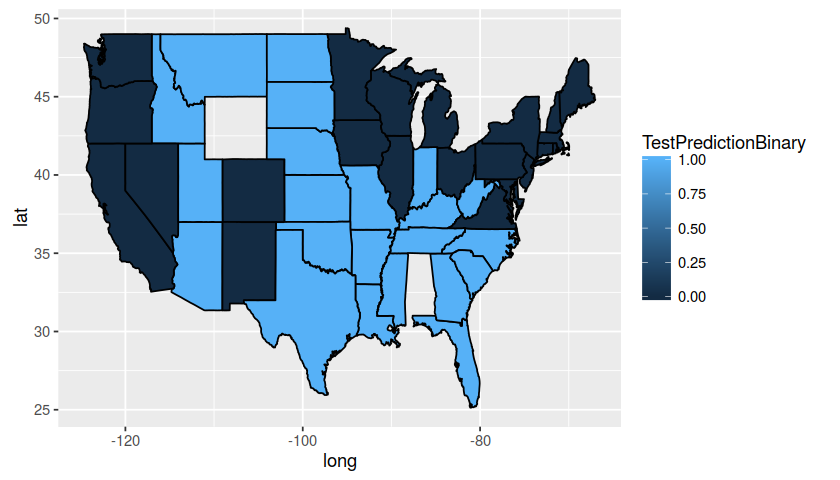

In [24]:
ggplot(predictionMap, aes(x=long, y=lat,
                          group=group, fill=TestPredictionBinary)) +
    geom_polygon(color='black')

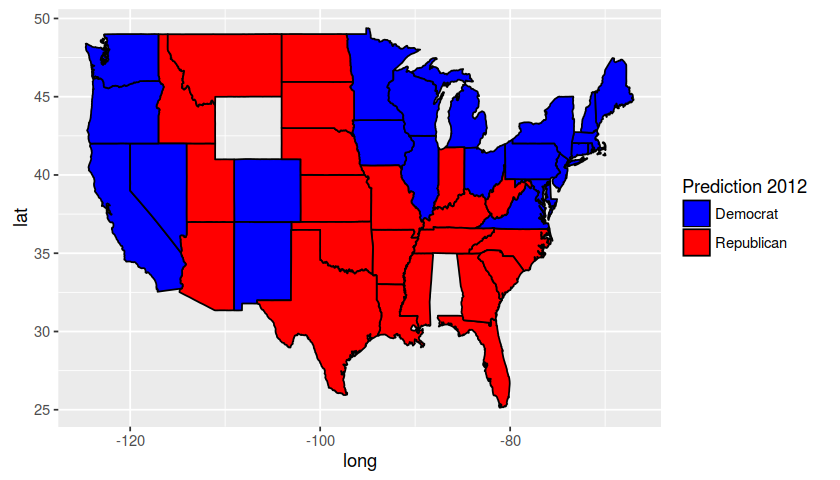

In [25]:
ggplot(predictionMap, aes(x=long, y=lat,
                          group=group, fill=TestPredictionBinary)) +
    geom_polygon(color='black') +
    scale_fill_gradient(low='blue', high='red', guide='legend',
                        breaks=c(0,1), labels=c('Democrat', 'Republican'),
                        name='Prediction 2012')

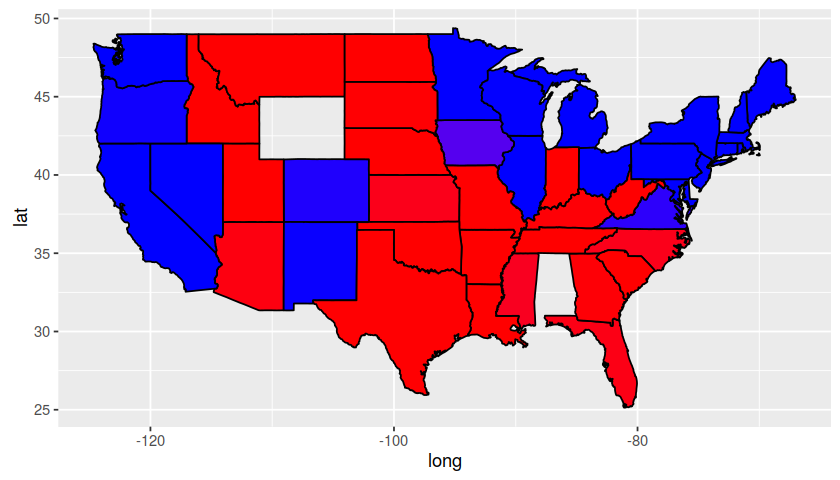

In [26]:
ggplot(predictionMap, aes(x=long, y=lat,
                          group=group, fill=TestPrediction)) +
    geom_polygon(color='black') +
    scale_fill_gradient(low='blue', high='red', guide='legend',
                        breaks=c(0,1), labels=c('Democrat', 'Republican'),
                        name='Prediction 2012')

In [31]:
#str(predictionMap)
head(subset(predictionMap, test.State=='Florida'))

,region,long,lat,group,order,subregion,TestPrediction,TestPredictionBinary,test.State
1150,florida,-85.0154800415039,30.9970169067383,9,1462,NA,0.964039495344072,1,Florida
1151,florida,-84.998291015625,30.9626407623291,9,1463,NA,0.964039495344072,1,Florida
1148,florida,-84.9753723144531,30.9225311279297,9,1464,NA,0.964039495344072,1,Florida
1158,florida,-84.9467239379883,30.8996162414551,9,1465,NA,0.964039495344072,1,Florida
1159,florida,-84.9409942626953,30.8881549835205,9,1466,NA,0.964039495344072,1,Florida
1156,florida,-84.9467239379883,30.8595085144043,9,1467,NA,0.964039495344072,1,Florida


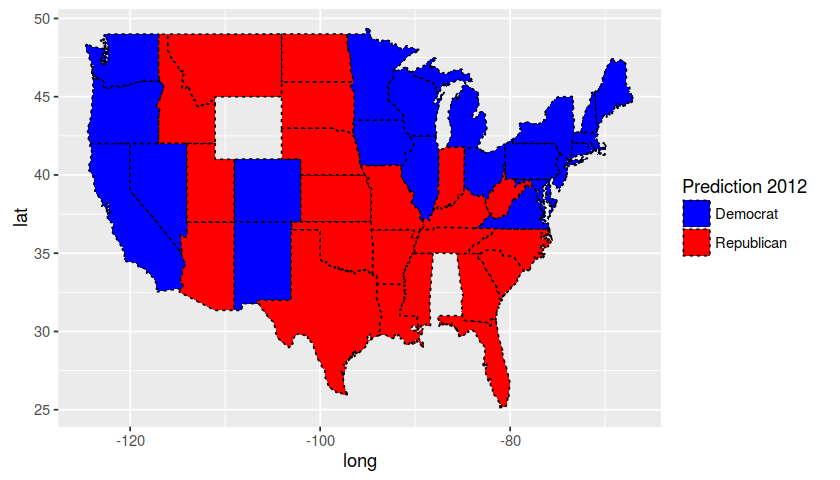

In [39]:
ggplot(predictionMap, aes(x=long, y=lat,
                          group=group, fill=TestPredictionBinary)) +
    geom_polygon(color='black', linetype=3) +
    scale_fill_gradient(low='blue', high='red', guide='legend',
                        breaks=c(0,1), labels=c('Democrat', 'Republican'),
                        name='Prediction 2012')